In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
#from mpl_toolkits.basemap import Basemap

In [2]:
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_chida.csv'
link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code='?raw=true'
url=link+code
df = pd.read_csv(url,sep=',',index_col=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 2014-08-29 to 2016-03-23
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2484 non-null   object 
 1   No. of confirmed cases   2484 non-null   float64
 2   No. of confirmed deaths  1648 non-null   float64
dtypes: float64(2), object(1)
memory usage: 77.6+ KB


In [4]:
df.head()

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,Guinea,482.0,287.0
2014-08-29,Nigeria,15.0,6.0
2014-08-29,Sierra Leone,935.0,380.0
2014-08-29,Liberia,322.0,225.0
2014-09-05,Guinea,604.0,362.0


In [5]:
df.tail()

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2016-03-23,Liberia,3151.0,NaN
2016-03-23,Italy,1.0,NaN
2016-03-23,Liberia,2.0,1.0
2016-03-23,Nigeria,19.0,7.0
2016-03-23,United States of America,4.0,1.0


In [6]:
df.isnull()

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,False,False,False
2014-08-29,False,False,False
2014-08-29,False,False,False
2014-08-29,False,False,False
2014-09-05,False,False,False
...,...,...,...
2016-03-23,False,False,True
2016-03-23,False,False,True
2016-03-23,False,False,False


In [7]:
df.isnull().sum()

Country                      0
No. of confirmed cases       0
No. of confirmed deaths    836
dtype: int64

In [8]:
df['Country'].isin(['Mexico']).sum()

0

In [9]:
SL=df[df['Country']=='Sierra Leone']

In [10]:
SL.head()

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,Sierra Leone,935.0,380.0
2014-09-05,Sierra Leone,1146.0,443.0
2014-09-08,Sierra Leone,1234.0,461.0
2014-09-12,Sierra Leone,1287.0,478.0
2014-09-16,Sierra Leone,1464.0,514.0


In [11]:
SL = SL.drop('Country', axis=1)

In [12]:
SL[15:20]

,No. of confirmed cases,No. of confirmed deaths
Date,,
2014-10-22,3223.0,986.0
2014-10-25,3389.0,1008.0
2014-10-29,3700.0,NaN
2014-10-31,3778.0,NaN
2014-11-05,4057.0,893.0


In [13]:
SL.shape

(259, 2)

In [14]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    2
dtype: int64

In [15]:
SL.fillna(0.0,inplace=True)

In [16]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    0
dtype: int64

In [18]:
SL.describe()

,No. of confirmed cases,No. of confirmed deaths
count,259.000000,259.000000
mean,7883.671815,3081.019305
std,1787.114320,902.671073
min,935.000000,0.000000
25%,8135.000000,2975.000000
50%,8614.000000,3545.000000
75%,8697.000000,3586.000000
max,8704.000000,3589.000000


In [32]:
NCC=SL['No. of confirmed cases'][0:-1:10]
NCD=SL['No. of confirmed deaths'][0:-1:10]
Dates=SL.index[0:-1:10]

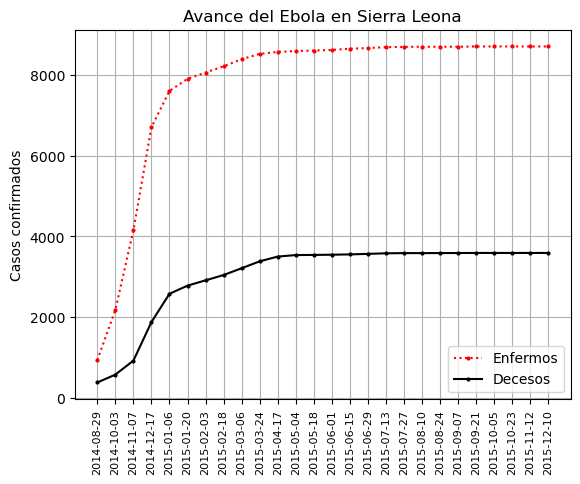

In [42]:
plt.plot(Dates,NCC,'o:r',ms=2,label='Enfermos')
plt.plot(Dates,NCD,'o-k',ms=2,label='Decesos')
plt.grid()
plt.title('Avance del Ebola en Sierra Leona')
plt.ylabel('Casos confirmados')
plt.legend()
plt.xticks(rotation=90,fontsize=8)  # Rotar las fechas en el eje x
plt.savefig('SierraLeona.png', dpi=300, format='png')
plt.show()